## NNDL lab problem set 1 assn
Author: Xiaolan Li

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

1. Generate Some Data
2. Choose a Target Function
3. Plot Your Data
4. Create the Training Data

In [2]:
np.random.seed(0)
data_points = np.random.uniform(-10,10,(100,2))
data_points

array([[ 0.97627008,  4.30378733],
       [ 2.05526752,  0.89766366],
       [-1.52690401,  2.91788226],
       [-1.24825577,  7.83546002],
       [ 9.27325521, -2.33116962],
       [ 5.83450076,  0.5778984 ],
       [ 1.36089122,  8.51193277],
       [-8.57927884, -8.25741401],
       [-9.59563205,  6.65239691],
       [ 5.56313502,  7.40024296],
       [ 9.57236684,  5.98317128],
       [-0.77041275,  5.61058353],
       [-7.63451148,  2.79842043],
       [-7.13293425,  8.89337834],
       [ 0.43696644, -1.7067612 ],
       [-4.70888776,  5.48467379],
       [-0.87699336,  1.36867898],
       [-9.62420399,  2.35270994],
       [ 2.24191445,  2.33867994],
       [ 8.87496157,  3.63640598],
       [-2.80984199, -1.25936092],
       [ 3.95262392, -8.79549057],
       [ 3.33533431,  3.41275739],
       [-5.79234878, -7.42147405],
       [-3.69143298, -2.72578458],
       [ 1.40393541, -1.22796973],
       [ 9.76747676, -7.95910379],
       [-5.82246488, -6.77380964],
       [ 3.06216651,

In [3]:
train_x1 = data_points[:,0]
train_x2 = data_points[:,1]
results = 1.5 * train_x1 - train_x2 - 1
target = [1 if result >= 0 else -1 for result in results]
df_dataPoints = pd.DataFrame({'x1':train_x1,
                              'x2':train_x2,
                              'label':target})
actual_labels = df_dataPoints['label']
df_dataPoints

,x1,x2,label
0,0.976270,4.303787,-1
1,2.055268,0.897664,1
2,-1.526904,2.917882,-1
3,-1.248256,7.835460,-1
4,9.273255,-2.331170,1
...,...,...,...
95,-2.035579,-5.803125,1
96,-6.276140,8.887448,-1
97,4.791016,-0.190824,1
98,-5.451707,-4.912870,-1


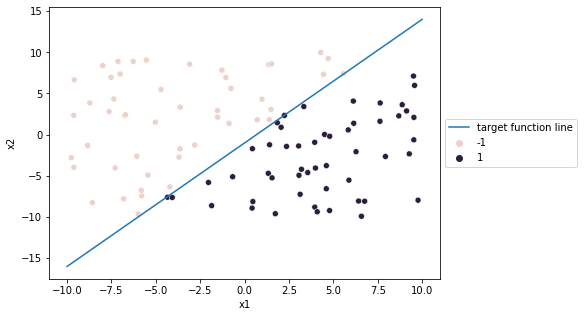

In [4]:
x=np.linspace(-10,10)
y = 1.5 * x - 1
sns.scatterplot(x='x1', y='x2', data=df_dataPoints, hue="label")
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x,y,label='target function line')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

5. Initialize the Perceptron
6. Classify the Data
7. Generate the Confusion Matrix
8. Evaluate the Result

In [5]:
Init_weights = np.zeros(3)
def perceptron_function(weights, x1, x2):
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    return w0 + w1 * x1 + w2 * x2

perceptron_results = perceptron_function(Init_weights, df_dataPoints['x1'], df_dataPoints['x2'])
predictive_labels = [1 if result>=0 else -1 for result in perceptron_results]
predictive_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

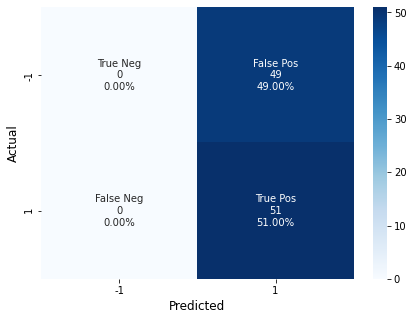

accuracy =  0.51


In [6]:
def plot_confusion_matrix(cf):
    # define annotation
    label_names = ['True Neg','False Pos','False Neg','True Pos']
    label_counts = [f'{value}' for value in cf.flatten()]
    label_perc = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
    annotation = [f'{name}\n{count}\n{perc}' for name, count, perc in zip(label_names,label_counts,label_perc)]
    annotation = np.asarray(annotation).reshape(2,2)
    categories = ['-1','1']

    # plot the table
    ax = sns.heatmap(cf, xticklabels=categories,yticklabels=categories, annot=annotation, fmt="", cmap='Blues')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()
    
# make the confusion matrix
cf_matrix = confusion_matrix(actual_labels, predictive_labels)
plot_confusion_matrix(cf_matrix)
# accuracy is sum of diagonal True counts divided by total observations
accuracy  = np.round(np.trace(cf_matrix) / float(np.sum(cf_matrix)), 2)
print('accuracy = ', accuracy)

From the above result, the accuracy of the perceptron with current weights is only 51%. We have to update the weight to fit our data better.

9. Update the Weights
10. Classify the Data.
11. Generate the Confusion Matrix

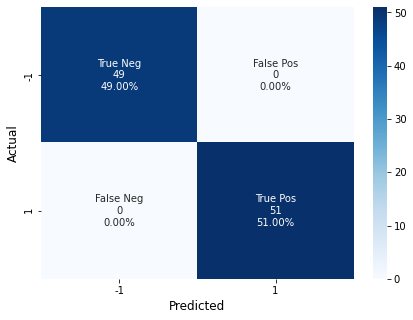

iterate 1053 steps to reach 100.0% accuracy
final updated weights [-48.          72.12991429 -47.98241993]


In [7]:
def perceptron(iterate_steps):
    # assign global variable to local variable
    current_weight = Init_weights
    pred_labels = predictive_labels
    
    for step in range(1, iterate_steps+1):
        # get current misclassified observations index
        misclassified_index = []
        index = 0
        for actual, pred in zip(actual_labels, pred_labels):
            if actual!=pred:
                misclassified_index.append(index)
            index+=1
            
        # reach accuracy conditions
        if misclassified_index == []:
            plot_confusion_matrix(cf_matrix)
            print(f'iterate {step} steps to reach {accuracy*100}% accuracy')
            return updated_weights
        
        # update weights    
        np.random.seed(0)
        random_misclassified_index = np.random.choice(misclassified_index,1)[0]
        xi = [1]+list(data_points[random_misclassified_index])
        yi = np.array(actual_labels[random_misclassified_index])
        updated_weights = current_weight+xi*yi
        current_weight = updated_weights
        
        # recalculate the pred_labels
        perceptron_results = perceptron_function(current_weight, df_dataPoints['x1'], df_dataPoints['x2'])
        pred_labels = [1 if result>=0 else -1 for result in perceptron_results]

        # make the confusion matrix
        cf_matrix = confusion_matrix(actual_labels, pred_labels)
        accuracy  = np.round(np.trace(cf_matrix) / float(np.sum(cf_matrix)), 4)
            
        # reach iterate conditions
        if step == iterate_steps:
            plot_confusion_matrix(cf_matrix)
            print(f'The current accuracy is {accuracy*100}%. We were unable to converge to a set of weights that correctly classifies the data. These data may not be linearly separable')
            return updated_weights
             

final_updated_weights = perceptron(iterate_steps=10000)
print('final updated weights', final_updated_weights)

12. Deploy the Model

In [8]:
# generate 30 test data points with different seed 1
np.random.seed(1)
test_data_points = np.random.uniform(-10,10,(30,2))
test_x1 = test_data_points[:,0]
test_x2 = test_data_points[:,1]

# using target function to do the classification and get the actual labels
test_results = 1.5 * test_x1 - test_x2 - 1
test_target = [1 if result >= 0 else -1 for result in test_results]

df_test_dataPoints = pd.DataFrame({'x1':test_x1,
                                   'x2':test_x2,
                                   'label':test_target})
test_actual_labels = df_test_dataPoints['label']
df_test_dataPoints

,x1,x2,label
0,-1.659560,4.406490,-1
1,-9.997713,-3.953349,-1
2,-7.064882,-8.153228,-1
3,-6.274796,-3.088785,-1
4,-2.064651,0.776335,-1
5,-1.616110,3.704390,-1
6,-5.910955,7.562349,-1
7,-9.452248,3.409350,-1
8,-1.653904,1.173797,-1
9,-7.192261,-6.037970,-1


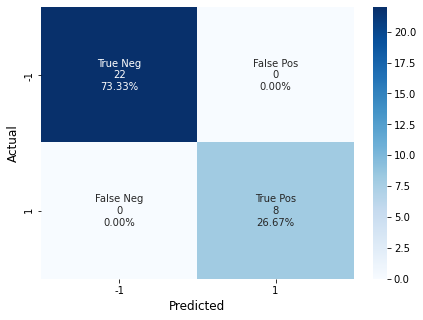

deployed approximate function accuracy 100.0%


In [9]:
# using approximate function to get the predictive labels
perceptron_results = perceptron_function(final_updated_weights, df_test_dataPoints['x1'], df_test_dataPoints['x2'])
test_pred_labels = [1 if result>=0 else -1 for result in perceptron_results]

# make the confusion matrix
cf_matrix = confusion_matrix(test_actual_labels, test_pred_labels)
plot_confusion_matrix(cf_matrix)

# accuracy is sum of diagonal True counts divided by total observations
test_accuracy  = np.round(np.trace(cf_matrix) / np.sum(cf_matrix), 4)
print(f'deployed approximate function accuracy {test_accuracy*100}%')

The result of the approximate deployed function performs 100% accuracy.